In [20]:

%matplotlib inline

import pandas as pd
import streamlit as st
import matplotlib.pyplot as plt
import matplotlib_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')

In [2]:


url = "https://raw.githubusercontent.com/danielgrijalva/movie-stats/refs/heads/master/movies.csv"
movies = pd.read_csv(url)


In [3]:
movies.head(5)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [4]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      7668 non-null   object 
 1   rating    7591 non-null   object 
 2   genre     7668 non-null   object 
 3   year      7668 non-null   int64  
 4   released  7666 non-null   object 
 5   score     7665 non-null   float64
 6   votes     7665 non-null   float64
 7   director  7668 non-null   object 
 8   writer    7665 non-null   object 
 9   star      7667 non-null   object 
 10  country   7665 non-null   object 
 11  budget    5497 non-null   float64
 12  gross     7479 non-null   float64
 13  company   7651 non-null   object 
 14  runtime   7664 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 898.7+ KB


In [5]:
movies[movies.duplicated()]

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime


In [6]:
movies.count()

name        7668
rating      7591
genre       7668
year        7668
released    7666
score       7665
votes       7665
director    7668
writer      7665
star        7667
country     7665
budget      5497
gross       7479
company     7651
runtime     7664
dtype: int64

In [7]:
movies = movies.dropna()

In [8]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5421 entries, 0 to 7652
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      5421 non-null   object 
 1   rating    5421 non-null   object 
 2   genre     5421 non-null   object 
 3   year      5421 non-null   int64  
 4   released  5421 non-null   object 
 5   score     5421 non-null   float64
 6   votes     5421 non-null   float64
 7   director  5421 non-null   object 
 8   writer    5421 non-null   object 
 9   star      5421 non-null   object 
 10  country   5421 non-null   object 
 11  budget    5421 non-null   float64
 12  gross     5421 non-null   float64
 13  company   5421 non-null   object 
 14  runtime   5421 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 677.6+ KB


In [9]:
avg_budget  = movies.groupby("genre")["budget"].mean().round()
avg_budget

genre
Action       58468560.0
Adventure    45958899.0
Animation    76323357.0
Biography    25441668.0
Comedy       22802372.0
Crime        22602897.0
Drama        23241877.0
Family       51125000.0
Fantasy      17224390.0
Horror       13434530.0
Mystery      31876471.0
Romance      24040000.0
Sci-Fi       24416667.0
Thriller     12742857.0
Western      10500000.0
Name: budget, dtype: float64

In [10]:
avg_budget  = avg_budget.reset_index()
avg_budget

,genre,budget
0,Action,58468560.0
1,Adventure,45958899.0
2,Animation,76323357.0
3,Biography,25441668.0
4,Comedy,22802372.0
5,Crime,22602897.0
6,Drama,23241877.0
7,Family,51125000.0
8,Fantasy,17224390.0
9,Horror,13434530.0


In [11]:
movies

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7648,Bad Boys for Life,R,Action,2020,"January 17, 2020 (United States)",6.6,140000.0,Adil El Arbi,Peter Craig,Will Smith,United States,90000000.0,426505244.0,Columbia Pictures,124.0
7649,Sonic the Hedgehog,PG,Action,2020,"February 14, 2020 (United States)",6.5,102000.0,Jeff Fowler,Pat Casey,Ben Schwartz,United States,85000000.0,319715683.0,Paramount Pictures,99.0
7650,Dolittle,PG,Adventure,2020,"January 17, 2020 (United States)",5.6,53000.0,Stephen Gaghan,Stephen Gaghan,Robert Downey Jr.,United States,175000000.0,245487753.0,Universal Pictures,101.0
7651,The Call of the Wild,PG,Adventure,2020,"February 21, 2020 (United States)",6.8,42000.0,Chris Sanders,Michael Green,Harrison Ford,Canada,135000000.0,111105497.0,20th Century Studios,100.0


In [ ]:
fig = plt.figure(figsize=(19,10))

<Figure size 1900x1000 with 0 Axes>

In [14]:
avg_budget

,genre,budget
0,Action,58468560.0
1,Adventure,45958899.0
2,Animation,76323357.0
3,Biography,25441668.0
4,Comedy,22802372.0
5,Crime,22602897.0
6,Drama,23241877.0
7,Family,51125000.0
8,Fantasy,17224390.0
9,Horror,13434530.0


Text(0.5, 1.0, 'Matplotlib Bar Chart Showing the Average Budget of Movies in Each Genre')

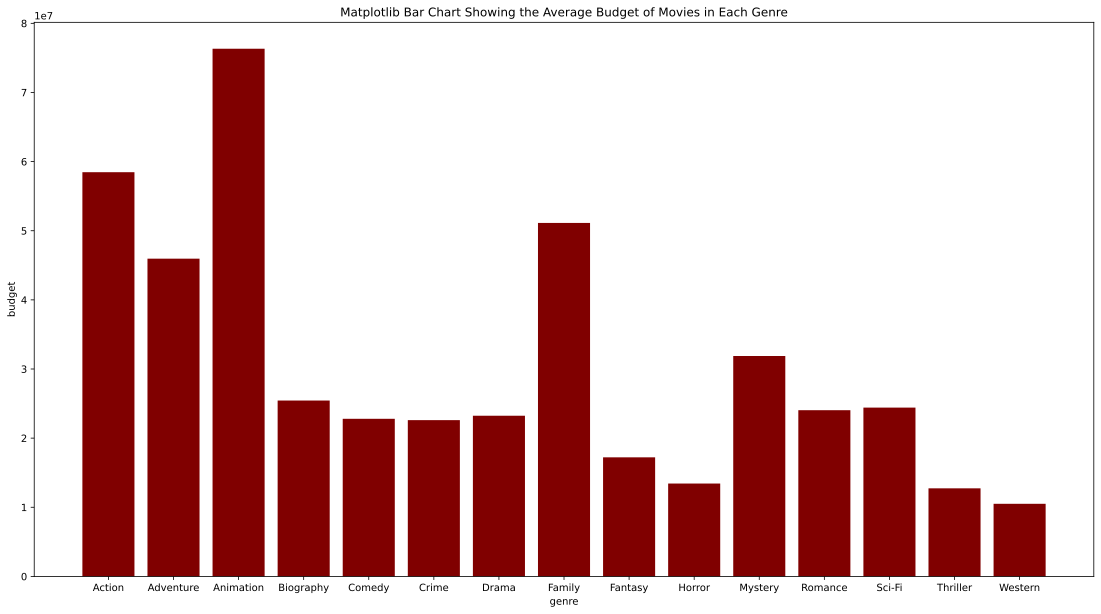

In [28]:
# avg_budget.plot(kind="bar")

fig = plt.figure(figsize = (19, 10))

plt.bar(avg_budget['genre'], avg_budget['budget'], color = 'maroon')
plt.xlabel('genre')
plt.ylabel('budget')
plt.title('Matplotlib Bar Chart Showing the Average Budget of Movies in Each Genre')





In [31]:
movies['score'].unique().tolist()
# movies['genre'].unique().tolist()
# movies['year'].unique().tolist()

[8.4,
 5.8,
 8.7,
 7.7,
 7.3,
 6.4,
 7.9,
 8.2,
 6.8,
 7.0,
 6.1,
 5.3,
 7.1,
 7.2,
 6.9,
 6.5,
 6.7,
 6.2,
 6.3,
 6.0,
 5.1,
 4.6,
 5.4,
 5.9,
 4.0,
 7.5,
 7.4,
 7.6,
 3.4,
 6.6,
 5.6,
 5.2,
 4.3,
 5.0,
 2.7,
 5.5,
 8.1,
 7.8,
 4.4,
 8.0,
 5.7,
 3.7,
 3.9,
 4.7,
 8.3,
 4.9,
 4.1,
 3.0,
 3.8,
 8.5,
 4.5,
 4.8,
 3.2,
 2.6,
 2.2,
 4.2,
 8.6,
 2.9,
 8.9,
 3.6,
 9.3,
 8.8,
 3.3,
 3.5,
 2.5,
 2.3,
 3.1,
 2.1,
 1.9,
 2.4,
 2.8,
 9.0]